In [5]:
#예제 8.1)
import pandas as pd
data=pd.read_csv('ex8-1.csv')
data #aggregate:골재, y:평균수분흡수율

,sample,aggregate,y
0,1,a1,551
1,2,a1,457
2,3,a1,450
3,4,a1,731
4,5,a1,499
5,6,a1,632
6,7,a2,595
7,8,a2,580
8,9,a2,508
9,10,a2,583


In [2]:
data.groupby('aggregate').y.describe()

,count,mean,std,min,25%,50%,75%,max
aggregate,,,,,,,,
a1,6.0,553.333333,110.153832,450.0,467.50,525.0,611.75,731.0
a2,6.0,569.333333,47.986109,508.0,532.75,581.5,592.00,633.0
a3,6.0,610.500000,59.945809,511.0,583.50,627.0,645.75,677.0
a4,6.0,465.166667,57.607002,415.0,422.25,443.5,500.00,555.0
a5,6.0,610.666667,58.783218,522.0,575.50,622.0,649.75,679.0


In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
fit=smf.ols('y~aggregate', data).fit()
#OLS: ordinary least square(최소제곱추정) = LSE
sm.stats.anova_lm(fit, typ=1).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
aggregate,4.0,85356.467,21339.117,4.302,0.009
Residual,25.0,124020.333,4960.813,NaN,NaN


In [7]:
!python han-font.py
exec(open('han-font.py').read())

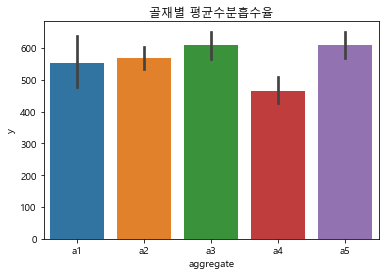

In [11]:
# 골재에 따른 평균수분흡수율에 대한 막대도표
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='aggregate', y='y', data=data)
plt.title('골재별 평균수분흡수율')
plt.show()

In [12]:
#예제 8.2
import pandas as pd
data=pd.read_csv('ex8-2.csv')
data #A :기계 B: 작업자 Y:작업속도

,A,B,Y
0,1,1,42.5
1,2,1,39.8
2,3,1,40.2
3,4,1,41.3
4,1,2,39.3
5,2,2,40.1
6,3,2,40.5
7,4,2,42.2
8,1,3,39.6
9,2,3,40.5


In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

fit=smf.ols('Y~C(A)+C(B)', data).fit()
sm.stats.anova_lm(fit, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(A),3.0,15.924583,5.308194,3.338779,0.047904
C(B),5.0,42.087083,8.417417,5.294435,0.005328
Residual,15.0,23.847917,1.589861,NaN,NaN


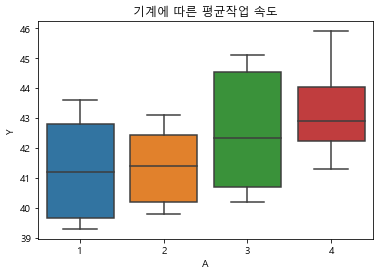

In [14]:
sns.boxplot(x="A", y="Y", data=data)
plt.title("기계에 따른 평균작업 속도")
plt.show()

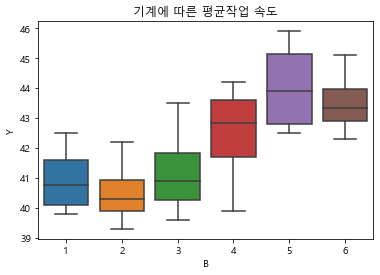

In [16]:
sns.boxplot(x="B", y="Y", data=data)
plt.title("기계에 따른 평균작업 속도")
plt.show()

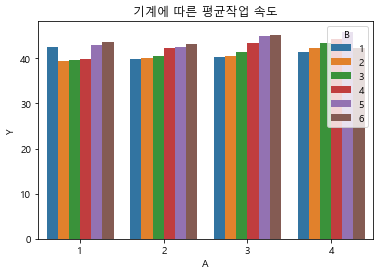

In [18]:
sns.barplot(x="A", y="Y", hue="B", data=data)
plt.title("기계에 따른 평균작업 속도")
plt.show()